In [1]:
#ISHAN

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
import seaborn as sns
from matplotlib.dates import DateFormatter

import time
from datetime import date
from datetime import datetime
from math import log

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



Plot settings

In [2]:
data = pd.read_csv("/Users/skambasta/Downloads/sample_user_data.csv")
data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,27376579751715,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,39460501403861,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,40862739425590,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,40862739425590,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,62267706107999,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


In [3]:
#Checking dimension of data frame
data.shape

(464704, 17)

In [4]:
#Checking Property of Attributes in DataFrame
data.dtypes

fullVisitorId                      object
visitNumber                         int64
date                                int64
visitStartTime                      int64
totals_bounces                    float64
totals_pageviews                  float64
totals_timeOnSite                 float64
totals_totalTransactionRevenue    float64
totals_transactions               float64
trafficSource_source               object
trafficSource_medium               object
trafficSource_campaign             object
device_deviceCategory              object
device_operatingSystem             object
device_mobileDeviceModel           object
geoNetwork_city                    object
channelGrouping                    object
dtype: object

In [5]:
#A list of all column Names in the dataset
data.columns

Index(['fullVisitorId', 'visitNumber', 'date', 'visitStartTime',
       'totals_bounces', 'totals_pageviews', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactions',
       'trafficSource_source', 'trafficSource_medium',
       'trafficSource_campaign', 'device_deviceCategory',
       'device_operatingSystem', 'device_mobileDeviceModel', 'geoNetwork_city',
       'channelGrouping'],
      dtype='object')

Cleaning the Dataset

In [6]:
#Changing Column Names to Appropriate Labels
data.rename(columns = {       'date' : 'Date',
                              'totals_bounces' : 'Bounces',
                              'totals_pageviews' : 'Page_Views',
                              'totals_timeOnSite' : 'Avg_Session_Duration',
                              'totals_totalTransactionRevenue' : 'Transaction_Revenue', #Transaction_Amt
                              'totals_transactions' : 'Transaction_Total',
                              'trafficSource_source' : 'Traffic_Source',
                              'trafficSource_medium' : 'Traffic_SourceMedium',
                              'trafficSource_campaign' : 'Traffic_SourceCampaign',
                              'device_deviceCategory' : 'Device_Category',
                              'device_operatingSystem' : 'OperatingSystem',
                              'device_mobileDeviceModel' : 'Device_Model',
                              'geoNetwork_city' : 'City'},inplace = True)


In [7]:
#Checking Nulls in dataset
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({"Missing_count":data.isnull().sum(),
                                 'percent_missing': round(percent_missing,2)})
missing_value_data

,Missing_count,percent_missing
fullVisitorId,0,0.00
visitNumber,0,0.00
Date,0,0.00
visitStartTime,0,0.00
Bounces,232332,50.00
Page_Views,52,0.01
Avg_Session_Duration,233021,50.14
Transaction_Revenue,458396,98.64
Transaction_Total,458396,98.64
Traffic_Source,0,0.00


In [8]:
# Checking for inconsistencies in Transaction Data
# 7th Column-Transaction_Revenue
# 8th Column-Transaction_Total 
for i in range(0,len(data),1):
    if (pd.isna(data.iloc[i,7])) and (pd.notna(data.iloc[i,8])):
        print('Transaction_Revenue missing when Number of Transactions not null at row ', i)
    
for m in range(0,len(data),1):
    if (pd.isna(data.iloc[m,8])) and (pd.notna(data.iloc[m,7])):
        print('Number of Transaction_Total missing when the Transacation Revenue is not null at row ', m)


In [9]:
#Since, the two conditional checks in the step above showed no results, we can continue with the following
# Replacing NAs in Transaction_Revenue and Transaction_Total
data['Transaction_Revenue'].fillna(0, inplace=True)
data['Transaction_Total'].fillna(0, inplace=True)

In [10]:
# Replacing NULLs in Page_Views
#5th column-Page_Views
#6th column-Avg_Session_Duration
for i in range(0,len(data),1):
    if (pd.isna(data.iloc[i,5])) and (pd.isna(data.iloc[i,6])):
        data.iloc[i,5] = 0

print(data["Page_Views"].mean())
#Mean value comes to around 3.77
data['Page_Views'] = data['Page_Views'].fillna((data['Page_Views'].mean()))

3.7703065921508796


In [11]:
#Replacing NULLs in Avg_session_duration [This Step takes some time to process...]
#6th Column = Avg_Session_Duration
#4th Column = Bounces

for i in range(0,len(data),1):
    if (pd.notna(data.iloc[i,4]))and (pd.isna(data.iloc[i,6])):
        data.iloc[i,6] = 0


In [12]:
print(data['Avg_Session_Duration'].mean())
#Mean Value of Avg_Session_Duration is 139.729
data['Avg_Session_Duration'] = data['Avg_Session_Duration'].fillna((data['Avg_Session_Duration'].mean()))

139.72984178565426


In [13]:
# Replacing NULLS in Bounces
data['Bounces'].fillna(0, inplace=True)

In [14]:
# Double checking if all NULLS have been treated
data.isnull().sum()

fullVisitorId             0
visitNumber               0
Date                      0
visitStartTime            0
Bounces                   0
Page_Views                0
Avg_Session_Duration      0
Transaction_Revenue       0
Transaction_Total         0
Traffic_Source            0
Traffic_SourceMedium      0
Traffic_SourceCampaign    0
Device_Category           0
OperatingSystem           0
Device_Model              0
City                      0
channelGrouping           0
dtype: int64

In [15]:
#Creating Additional Columns to aid the model
#Creating Transact Column : To indicate whether there was a transaction or not (0 - No, 1 - Yes)
data['transact'] = np.where(data['Transaction_Total']  == 0, '0','1')
data['transact'] = data['transact'].astype('str')

#Converting fullVisitorId to string type
data['fullVisitorId'] = data['fullVisitorId'].astype('str')

#Month: The Month is derived from 'Date' column 
#Day : The Day is derived from 'Date' column

# Create two new columns for month and day
data[['month']] = data[['Date']].applymap(str).applymap(lambda s: "{}".format(s[4:6]))
data[['day']] = data[['Date']].applymap(str).applymap(lambda s: "{}".format(s[6:]))

#Converting Month and Day to String type
data['month'] = data['month'].astype('str')
data['day'] = data['day'].astype('str')

#Hour : The hour is derived from the VisitStartTime column
data['mid_step'] = pd.to_datetime(data['visitStartTime'],unit='s')
data[['hour']] = data[['mid_step']].applymap(str).applymap(lambda s: "{}".format(s[11:13]))

#Transaction_Revenue : The Actual transaction amount is derived from Transaction_Revenue column
data['Transaction_Revenue'] = data['Transaction_Total'] / 1000000

In [16]:
#Removing Columns that don't add value to Model Building now
final_df = data.drop(['Date','visitStartTime','Device_Model','mid_step','Transaction_Total'],axis=1)

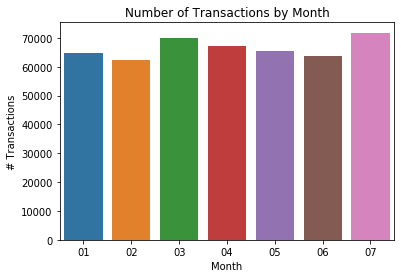

In [17]:
#Plotting to see Trend in Transactions across months
plot=sns.countplot(x='month', data=final_df[~final_df['transact'].str.startswith(('C'))])
plt.xlabel("Month")
plt.ylabel("# Transactions")
plt.title("Number of Transactions by Month")
plt.show(plot)

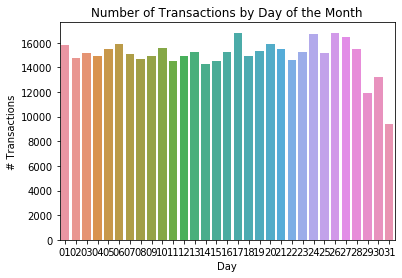

In [18]:
#Plotting to see Trend in Transactions across Days of the Month
plot=sns.countplot(x='day', data=final_df[~final_df['transact'].str.startswith(('C'))])
plt.xlabel("Day")
plt.ylabel("# Transactions")
plt.title("Number of Transactions by Day of the Month")
plt.show(plot)

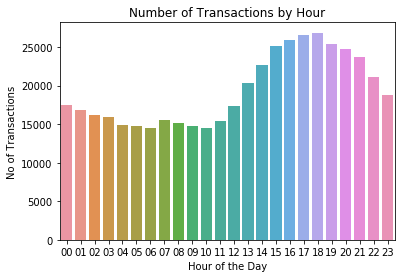

In [19]:
#Plotting to see Trend in Transactions Per Hour
plot=sns.countplot(x='hour', data=final_df[~final_df['transact'].str.startswith(('C'))])
plt.xlabel("Hour of the Day")
plt.ylabel("No of Transactions")
plt.title("Number of Transactions by Hour")
plt.show(plot)

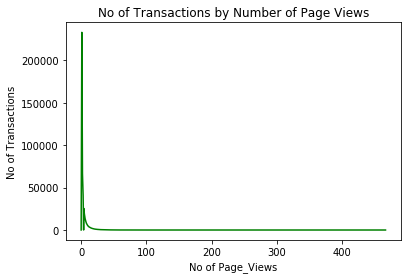

In [20]:
#Plotting to see Transactions and Page_Views Relation
temp_file = final_df.groupby(by=['Page_Views'], as_index=False)['transact'].count()
plt.plot(temp_file.Page_Views, temp_file.transact,color='green')
plt.xlabel('No of Page_Views')
plt.ylabel('No of Transactions')
plt.title('No of Transactions by Number of Page Views')
plt.show()

In [21]:
final_df.dtypes

fullVisitorId              object
visitNumber                 int64
Bounces                   float64
Page_Views                float64
Avg_Session_Duration      float64
Transaction_Revenue       float64
Traffic_Source             object
Traffic_SourceMedium       object
Traffic_SourceCampaign     object
Device_Category            object
OperatingSystem            object
City                       object
channelGrouping            object
transact                   object
month                      object
day                        object
hour                       object
dtype: object

In [22]:
#To convert categorical variables to integer using label encoder
Le = LabelEncoder()
category_columns = ['fullVisitorId','Traffic_Source','Traffic_SourceMedium','Traffic_SourceCampaign','Device_Category',
              'OperatingSystem','City','channelGrouping','transact','month','day','hour']

for i in category_columns:
    final_df[i]=Le.fit_transform(final_df[i])

In [23]:
#SPLITTING DATASET into Train and Test Dataset
#split dataset in features and target variable
feature_cols = ['fullVisitorId', 'visitNumber', 'Bounces','Page_Views','Avg_Session_Duration',
                'Traffic_Source','Traffic_SourceMedium','Traffic_SourceCampaign','Device_Category',
                'OperatingSystem','City','channelGrouping','day','month','hour']

#features
X = final_df[feature_cols] 

#Target variable
y = final_df.transact 

# Splitting dataset into training (70%) and test set(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Data is ready for Machine Learning fit and prediction

In [24]:
#Decision Tree Model
# Create Decision Tree classifer model
DTC = DecisionTreeClassifier()

# Train Decision Tree Classifer model
DTC = DTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DTC.predict(X_test)

In [25]:
# Model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Conf_Matrix",confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred)) #Yields Precision,recall,f1-score,support

Accuracy: 0.9804249275528649
Conf_Matrix [[136058   1467]
 [  1262    625]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    137525
           1       0.30      0.33      0.31      1887

    accuracy                           0.98    139412
   macro avg       0.64      0.66      0.65    139412
weighted avg       0.98      0.98      0.98    139412



In [26]:
#The Accuracy is around 98% and recall is high ,which implies the labelling wil be accurate.